In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
sns.set_style('whitegrid')
import matplotlib
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['text.usetex'] = True
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'legend.fontsize': 10})

In [2]:
fp = r'/home/t-sahuja/cultural_artifacts/notebooks/india-polygon.shp'
map_df = gpd.read_file(fp) 
map_df_copy = gpd.read_file(fp)
map_df.head()

,id,st_nm,geometry
0,NaN,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,NaN,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,NaN,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,NaN,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,NaN,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


In [3]:
results = pd.read_csv('/home/t-sahuja/cultural_artifacts/notebooks/results_plot.csv')

In [4]:
list_of_results = []
li_models = ['Llama 2', 'Falcon', 'GPT-4', 'Palm 2']
for model in li_models:
    score_data = {
        'State': results['States'],
        'Score': results[model]
    }
    list_of_results.append(pd.DataFrame(score_data))

In [5]:
def create_heatmap(df, map_df):
    df = df.copy()
    map_df = map_df.copy()
    states_with_data = df['State'].tolist()
    states_with_data = set(states_with_data)
    all_states = map_df['st_nm'].tolist()
    all_states = set(all_states)
    no_data_states = list(all_states - states_with_data)
    
    merged = map_df.set_index('st_nm').join(df.set_index('State'))
    merged['State'] = map_df['st_nm'].tolist()
    merged['Score'] = merged['Score'].replace(np.nan, 0)
    for state in no_data_states:
        merged.loc[merged['State'] == state, 'Score'] = -1
    merged['Score'] = merged['Score'].replace(-1, np.nan)
    return merged

/tmp/ipykernel_3850408/3207966544.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


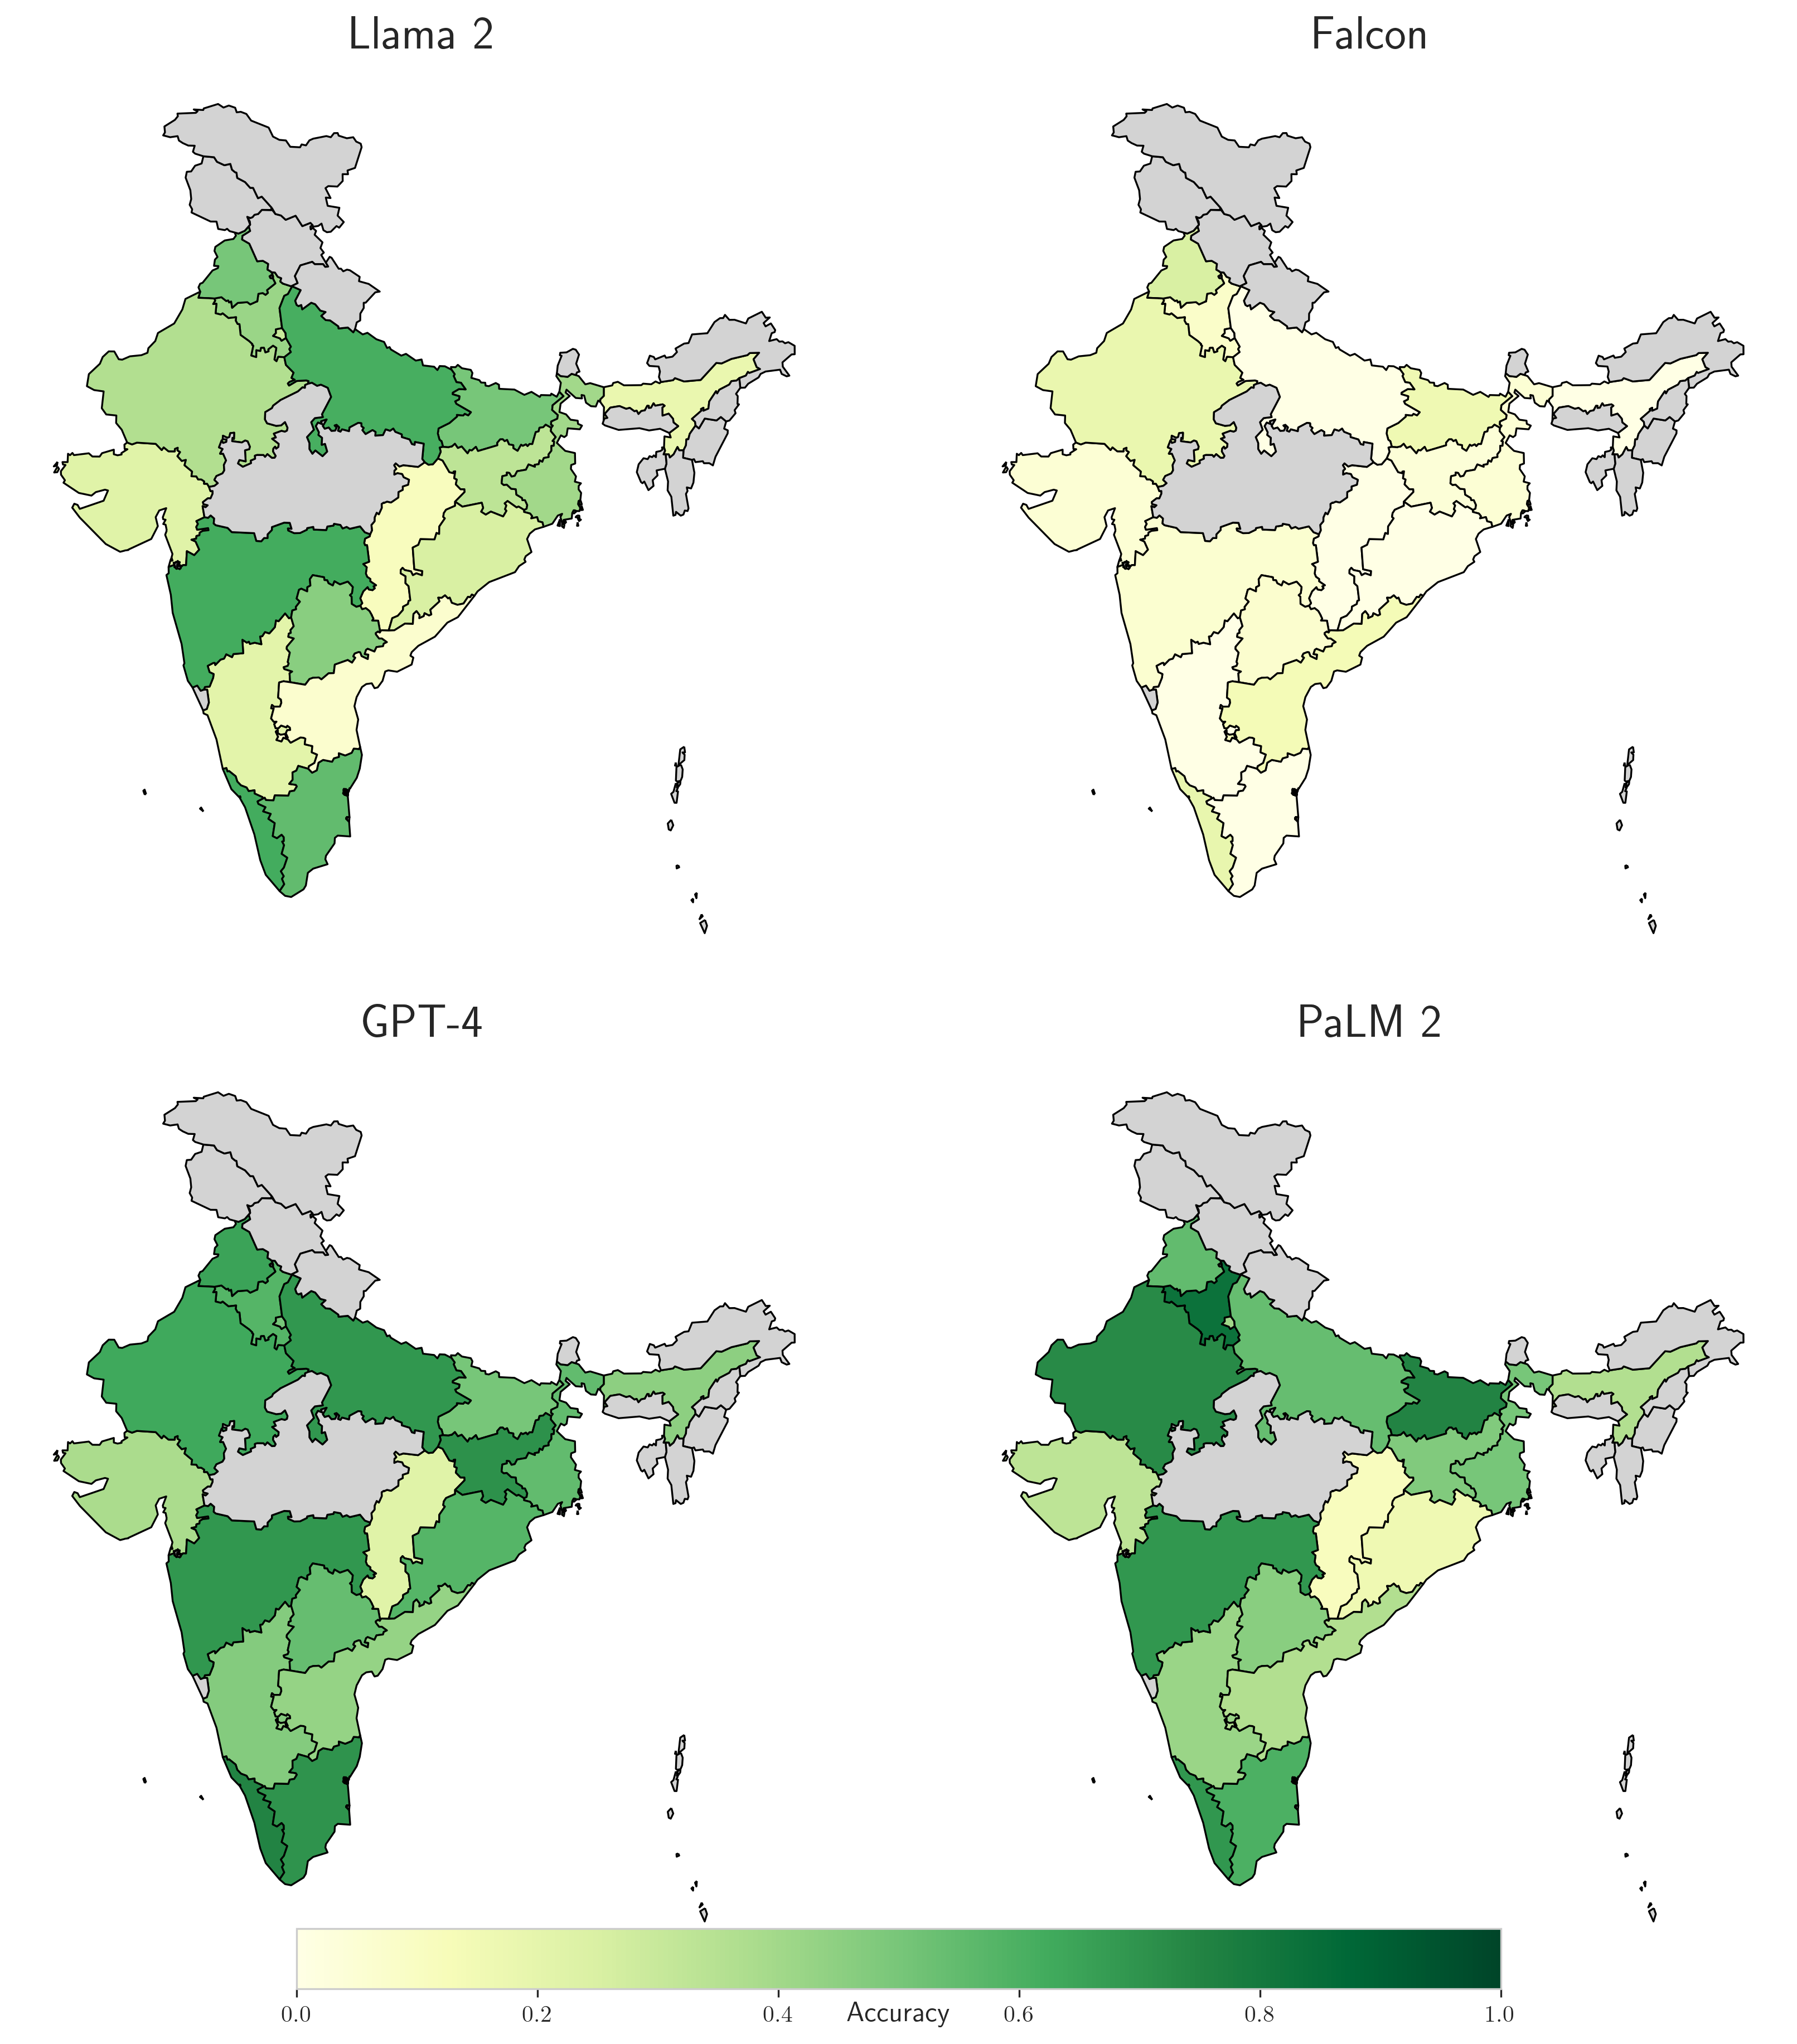

In [8]:
# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Define titles for each heatmap
titles = ["Llama 2", "Falcon", "GPT-4", "PaLM 2"]

df1, df2, df3, df4 = (
    list_of_results[0],
    list_of_results[1],
    list_of_results[2],
    list_of_results[3],
)

# Iterate through dataframes and titles
for i, (df, title) in enumerate(zip([df1, df2, df3, df4], titles)):
    # Calculate the subplot position
    row = i // 2
    col = i % 2

    # Call your create_heatmap function for each dataframe
    merged = create_heatmap(df, map_df)  # Assuming map_df is defined somewhere

    # Plot the heatmap in the appropriate subplot using Seaborn
    ax = axs[row, col]
    ax.axis("off")
    ax.set_title(title, fontdict={"fontsize": "20", "fontweight": "10"})
    merged.plot(
        column="Score",
        cmap="YlGn",
        linewidth=0.8,
        ax=ax,
        edgecolor="0",
        vmin=0,
        vmax=1,
        missing_kwds={
            'color': 'lightgray',
            'label': 'Missing values',
        }
    )
# ax.annotate('The greyed out area denotes that no data was collected/available for those states',
#             xy=(6, 6), xycoords='figure pixels')
# Create a common colorbar
cax = fig.add_axes([0.2, 0.002, 0.6, 0.03])  # Adjust the position as needed
sm = plt.cm.ScalarMappable(cmap="YlGn", norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
cbar.set_label("Accuracy", labelpad=-10)  # Replace with your legend label
# cbar.ax.set_xlabel("Accuracy", labelpad=-30) 
# ax.annotate('The greyed out area denotes that no data was collected/available for those states',
#             xy=(6, 6), xycoords='figure pixels')
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.savefig('heatmaps_india2.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()
